# **Data collection and preparation**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/SI ML Project/sdss_100k_galaxy_form_burst.csv', header=1)

In [ ]:
df.head(5)

,objid,specobjid,ra,dec,u,g,r,i,z,modelFlux_u,...,psfMag_z,expAB_u,expAB_g,expAB_r,expAB_i,expAB_z,class,subclass,redshift,redshift_err
0,1237646587710669400,8175185722644649984,82.038679,0.847177,21.73818,20.26633,19.32409,18.64037,18.23833,2.007378,...,19.43575,0.099951,0.311864,0.289370,0.270588,0.187182,GALAXY,STARFORMING,0.067749,0.000015
1,1237646588247540577,8175186822156277760,82.138894,1.063072,20.66761,19.32016,18.67888,18.24693,18.04122,5.403369,...,18.85012,0.366549,0.516876,0.517447,0.552297,0.636966,GALAXY,STARFORMING,0.105118,0.000010
2,1237646588247540758,8175187097034184704,82.028510,1.104003,23.63531,21.19671,19.92297,19.31443,18.68396,0.295693,...,19.42235,0.050000,0.417137,0.506950,0.549881,0.370166,GALAXY,STARFORMING,0.234089,0.000030
3,1237648702973083853,332152325571373056,198.544469,-1.097059,20.12374,18.41520,17.47202,17.05297,16.72423,8.920645,...,18.03204,0.310763,0.356827,0.389345,0.388160,0.416660,GALAXY,STARFORMING,0.110825,0.000030
4,1237648702973149350,332154249716721664,198.706864,-1.046217,-9999.00000,-9999.00000,18.37762,18.13383,17.78497,0.000000,...,19.02880,-9999.000000,-9999.000000,0.050000,0.050000,0.149973,GALAXY,STARFORMING,0.136658,0.000021


In [ ]:
df.shape

(100000, 43)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 43 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   objid         100000 non-null  int64  
 1   specobjid     100000 non-null  uint64 
 2   ra            100000 non-null  float64
 3   dec           100000 non-null  float64
 4   u             100000 non-null  float64
 5   g             100000 non-null  float64
 6   r             100000 non-null  float64
 7   i             100000 non-null  float64
 8   z             100000 non-null  float64
 9   modelFlux_u   100000 non-null  float64
 10  modelFlux_g   100000 non-null  float64
 11  modelFlux_r   100000 non-null  float64
 12  modelFlux_i   100000 non-null  float64
 13  modelFlux_z   100000 non-null  float64
 14  petroRad_u    100000 non-null  float64
 15  petroRad_g    100000 non-null  float64
 16  petroRad_i    100000 non-null  float64
 17  petroRad_r    100000 non-null  float64
 18  petro

In [ ]:
df.columns

Index(['objid', 'specobjid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z',
       'modelFlux_u', 'modelFlux_g', 'modelFlux_r', 'modelFlux_i',
       'modelFlux_z', 'petroRad_u', 'petroRad_g', 'petroRad_i', 'petroRad_r',
       'petroRad_z', 'petroFlux_u', 'petroFlux_g', 'petroFlux_i',
       'petroFlux_r', 'petroFlux_z', 'petroR50_u', 'petroR50_g', 'petroR50_i',
       'petroR50_r', 'petroR50_z', 'psfMag_u', 'psfMag_r', 'psfMag_g',
       'psfMag_i', 'psfMag_z', 'expAB_u', 'expAB_g', 'expAB_r', 'expAB_i',
       'expAB_z', 'class', 'subclass', 'redshift', 'redshift_err'],
      dtype='object')

In [ ]:
df.isnull().sum()

,0
objid,0
specobjid,0
ra,0
dec,0
u,0
g,0
r,0
i,0
z,0
modelFlux_u,0


In [ ]:
df.drop(columns=['objid', 'specobjid', 'ra', 'dec', 'class'], inplace=True)

In [ ]:
df['subclass'].replace(['STARFORMING', 'STARBURST'],[0,1], inplace=True)

/tmp/ipython-input-2127681358.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['subclass'].replace(['STARFORMING', 'STARBURST'],[0,1], inplace=True)
/tmp/ipython-input-2127681358.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['subclass'].replace(['STARFORMING', 'STARBURST'],[0,1], inpl

In [ ]:
df.head(10)

,u,g,r,i,z,modelFlux_u,modelFlux_g,modelFlux_r,modelFlux_i,modelFlux_z,...,psfMag_i,psfMag_z,expAB_u,expAB_g,expAB_r,expAB_i,expAB_z,subclass,redshift,redshift_err
0,21.73818,20.26633,19.32409,18.64037,18.23833,2.007378,7.823640,18.63581,34.98175,50.64961,...,20.07646,19.43575,0.099951,0.311864,0.289370,0.270588,0.187182,0,0.067749,0.000015
1,20.66761,19.32016,18.67888,18.24693,18.04122,5.403369,18.703640,33.76298,50.25997,60.73625,...,19.19277,18.85012,0.366549,0.516876,0.517447,0.552297,0.636966,0,0.105118,0.000010
2,23.63531,21.19671,19.92297,19.31443,18.68396,0.295693,3.318924,10.73388,18.80136,33.58972,...,20.00731,19.42235,0.050000,0.417137,0.506950,0.549881,0.370166,0,0.234089,0.000030
3,20.12374,18.41520,17.47202,17.05297,16.72423,8.920645,43.044740,102.61010,150.94260,204.31610,...,18.38868,18.03204,0.310763,0.356827,0.389345,0.388160,0.416660,0,0.110825,0.000030
4,-9999.00000,-9999.00000,18.37762,18.13383,17.78497,0.000000,0.000000,44.56038,55.77801,76.90784,...,19.09511,19.02880,-9999.000000,-9999.000000,0.050000,0.050000,0.149973,0,0.136658,0.000021
5,19.47473,18.18575,17.52763,17.14837,16.89580,16.220930,53.173800,97.48736,138.24510,174.45070,...,18.44931,18.23220,0.754158,0.767767,0.759105,0.742471,0.721491,0,0.111458,0.000011
6,20.24418,18.62780,17.76331,17.26417,16.97725,7.983503,35.389710,78.46472,124.26030,161.84220,...,18.35162,18.07458,0.273089,0.313715,0.309011,0.292027,0.299998,0,0.112151,0.000014
7,18.46020,17.27620,16.65430,16.25241,16.04085,41.296720,122.890900,217.91100,315.52490,383.40730,...,17.84073,17.66161,0.849475,0.902072,0.887647,0.868890,0.830413,0,0.110480,0.000009
8,18.70091,17.50793,17.04285,16.71619,16.54133,33.084900,99.272640,152.35630,205.83750,241.80370,...,19.06736,18.84762,0.419439,0.486001,0.518854,0.529878,0.622219,0,0.084629,0.000009
9,19.88486,18.45146,17.46034,16.99177,16.73163,11.117010,41.630880,103.72010,159.69530,202.92770,...,19.22301,18.83566,0.699929,0.840616,0.832805,0.817713,0.743459,0,0.237549,0.000035


# **EDA**

In [ ]:
df.describe()

,u,g,r,i,z,modelFlux_u,modelFlux_g,modelFlux_r,modelFlux_i,modelFlux_z,...,psfMag_i,psfMag_z,expAB_u,expAB_g,expAB_r,expAB_i,expAB_z,subclass,redshift,redshift_err
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,18.518622,17.258221,16.821739,16.362611,15.850865,30.683321,98.845058,175.621855,244.728134,307.474895,...,18.020203,17.435735,-0.603667,-0.522111,-0.309462,-0.410153,-0.740964,0.250070,0.116753,0.000179
std,105.082004,105.069066,95.035474,100.171155,114.206165,76.552859,229.479215,435.852215,619.825871,809.166087,...,100.181687,114.218604,104.870665,104.871474,94.860919,99.991654,114.005927,0.433055,0.100169,0.052189
min,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-47.451720,-11.935840,-42.440640,-54.385510,-144.460200,...,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,0.000000,-0.000833,0.000002
25%,18.762215,17.505868,16.898845,16.527097,16.281327,9.288132,34.462902,67.453910,91.777325,104.256550,...,18.295627,17.991602,0.299999,0.398705,0.418789,0.418656,0.381288,0.000000,0.055836,0.000008
50%,19.349715,18.072640,17.459080,17.091385,16.861105,18.195690,59.005915,103.828850,145.664550,180.086150,...,18.845780,18.563315,0.508688,0.588335,0.604795,0.604254,0.575397,0.000000,0.085850,0.000011
75%,20.079470,18.656182,17.926918,17.592650,17.453848,31.259628,99.438015,173.929225,244.944825,307.044675,...,19.586577,19.299430,0.699907,0.768804,0.773924,0.773119,0.752311,1.000000,0.135148,0.000015
max,30.960000,30.420980,31.173560,30.562360,28.553240,7915.306000,18668.400000,31755.990000,51923.480000,79058.460000,...,25.966680,27.043280,1.000000,1.000000,0.999999,1.000000,0.999998,1.000000,0.572899,16.503710


In [ ]:
df.duplicated().any()

np.False_

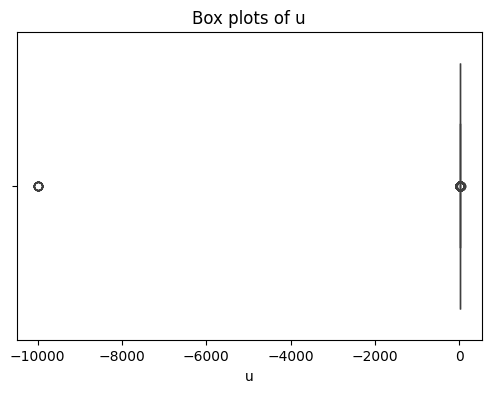

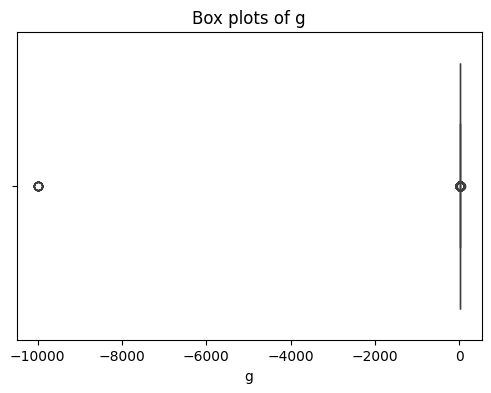

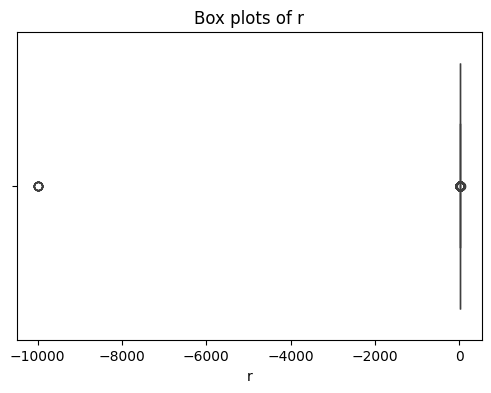

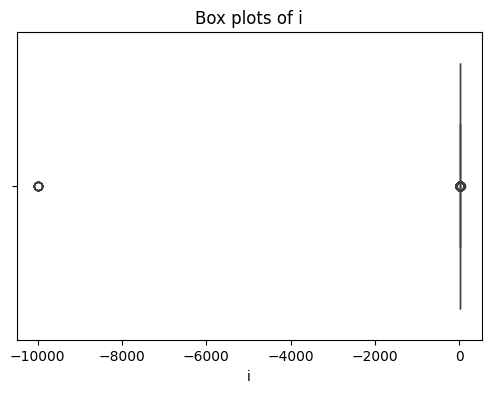

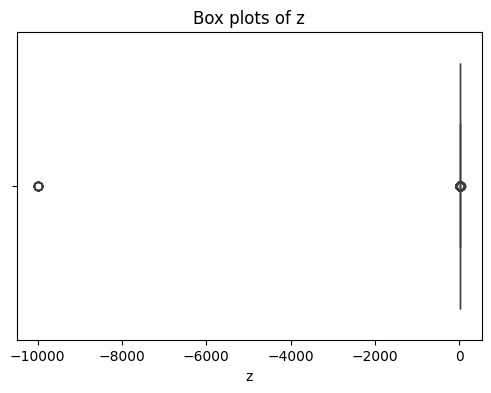

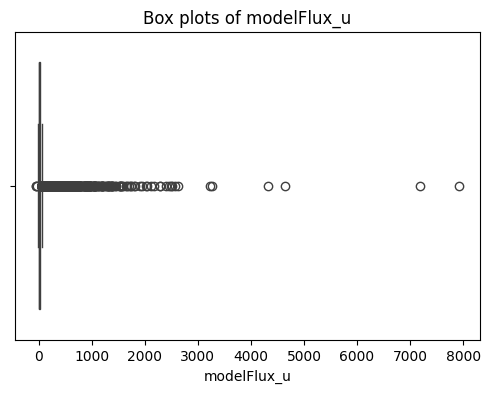

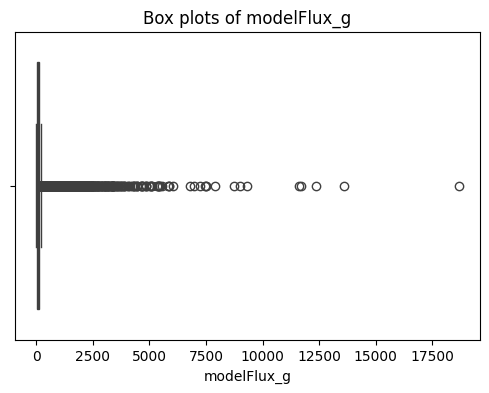

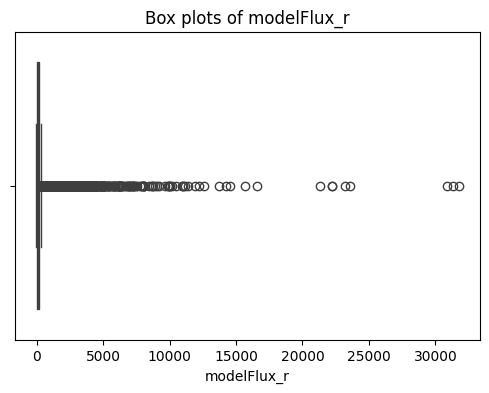

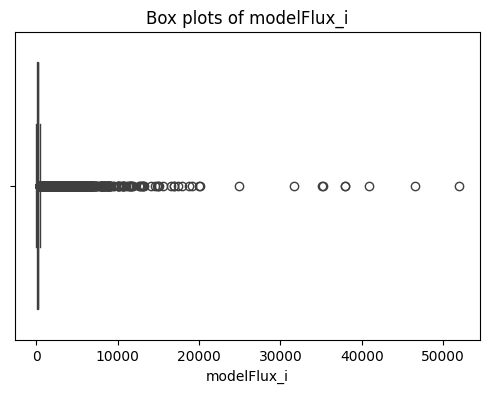

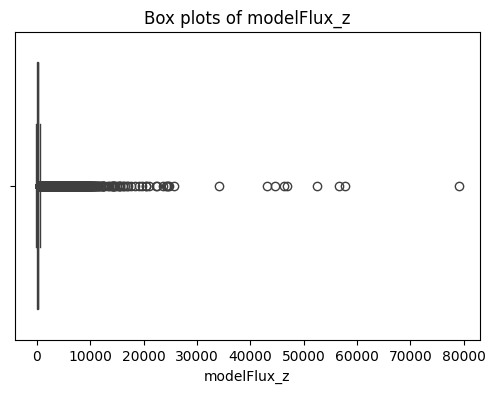

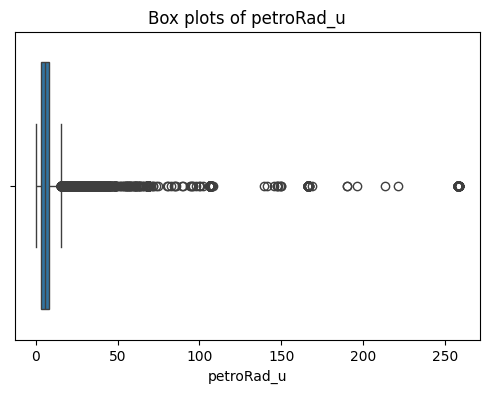

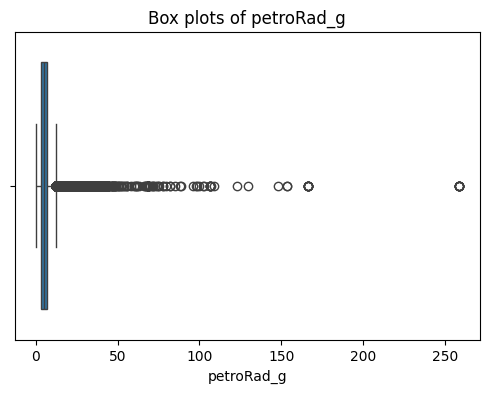

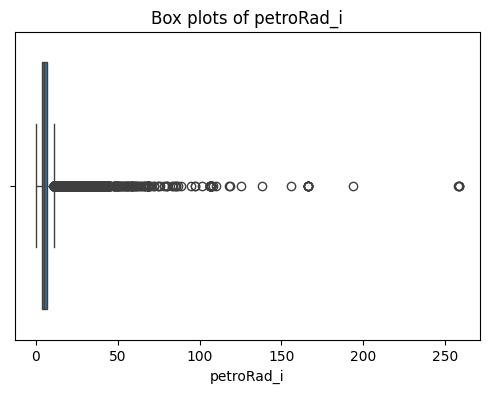

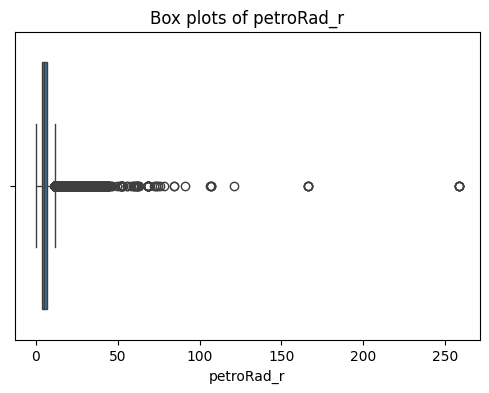

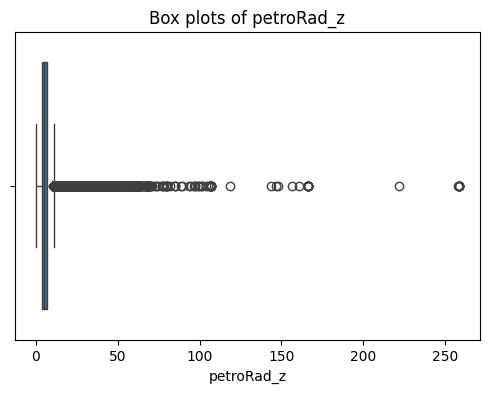

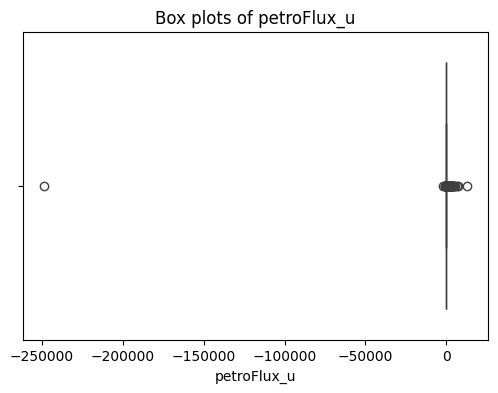

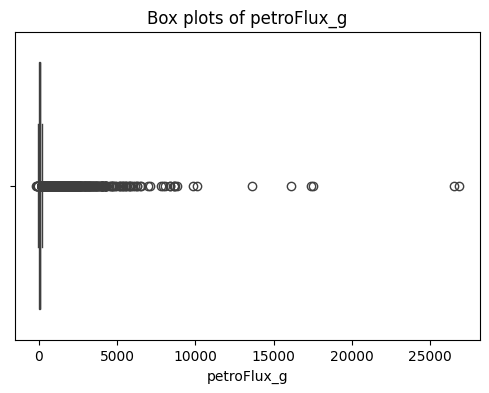

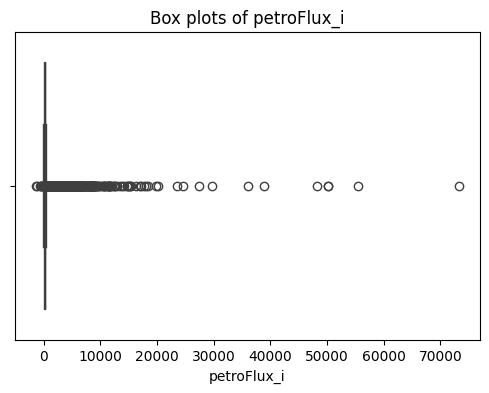

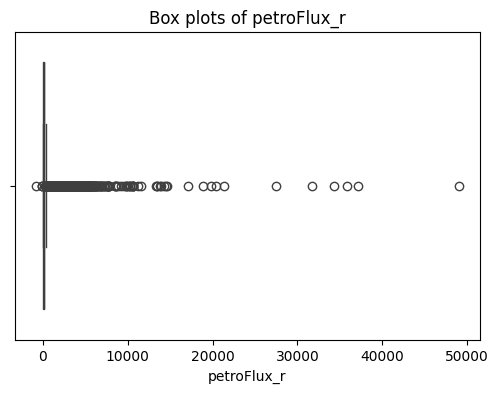

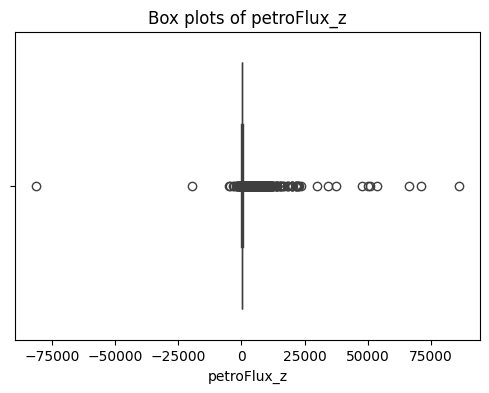

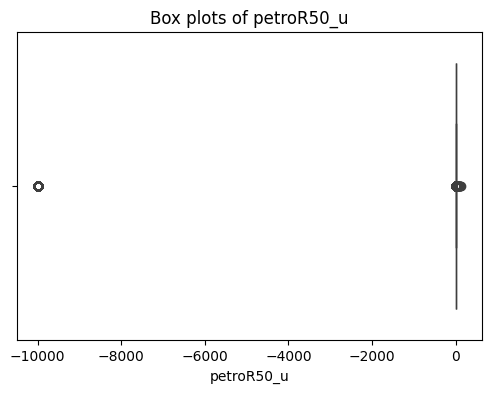

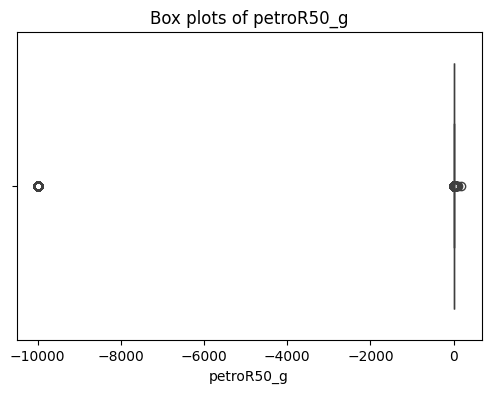

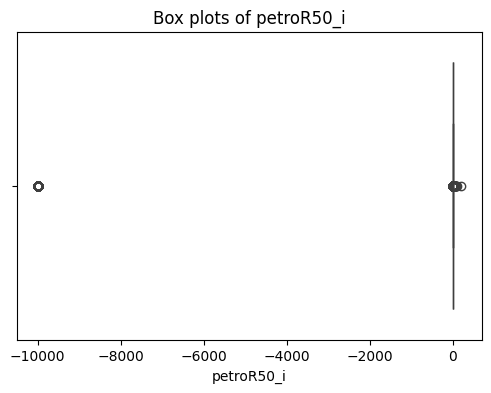

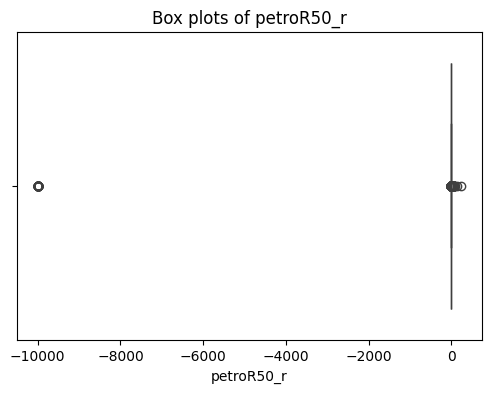

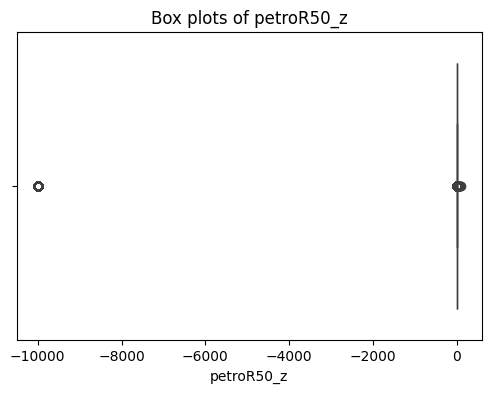

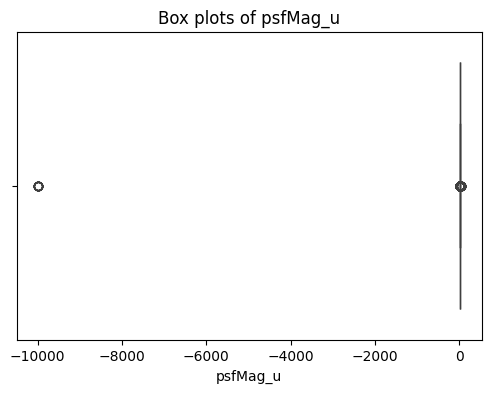

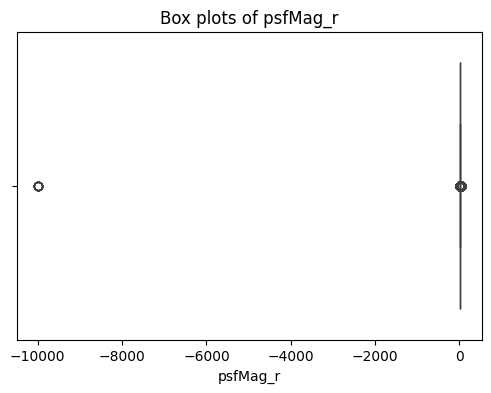

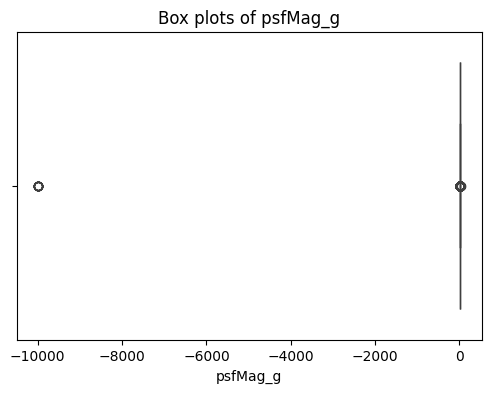

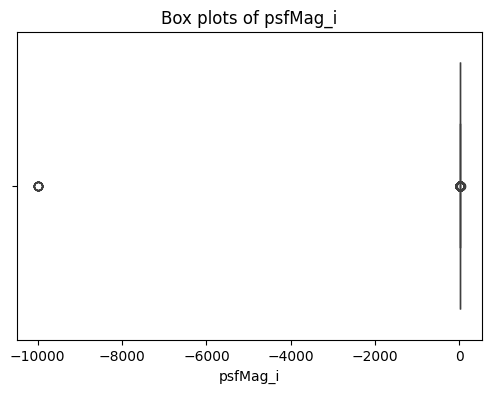

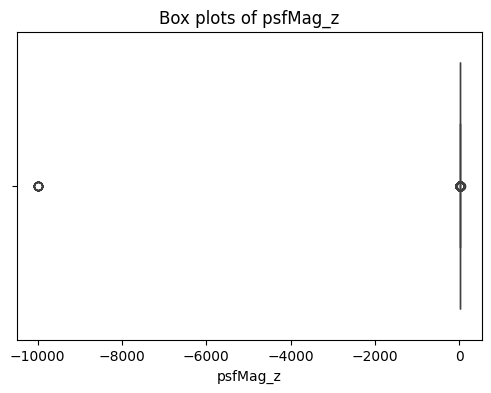

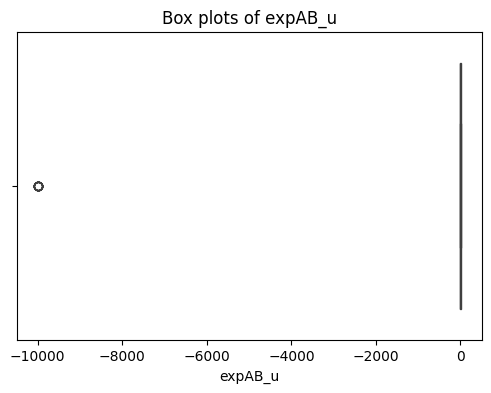

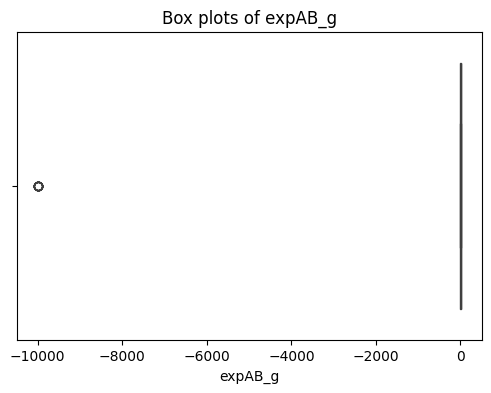

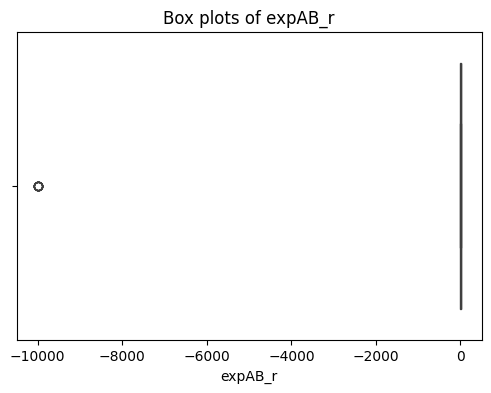

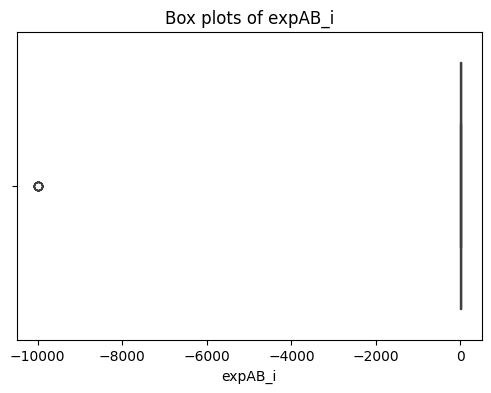

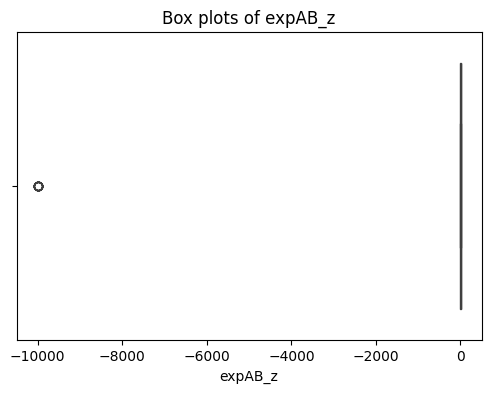

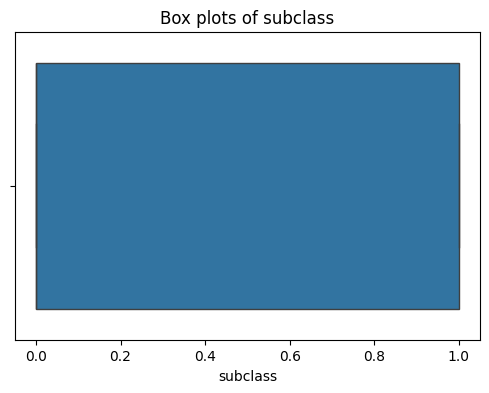

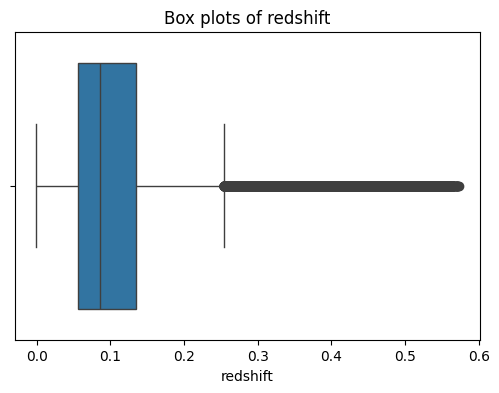

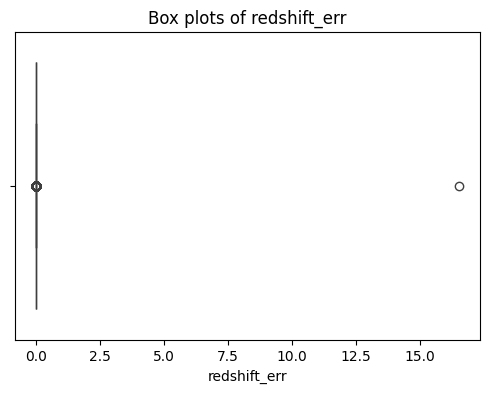

In [ ]:
for col in df.columns:
  if df[col].dtype != 'object':
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Box plots of {col}')
    plt.xlabel(col)
    plt.show()

In [ ]:
sub=df['subclass'].value_counts()
sub

,count
subclass,
0,74993
1,25007


array([<Axes: ylabel='count'>], dtype=object)

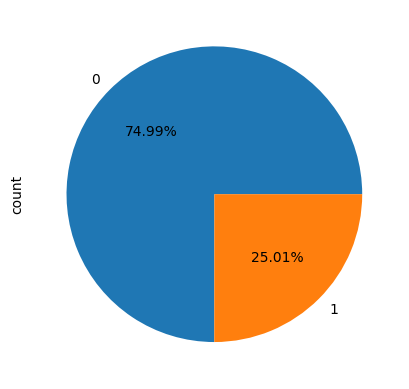

In [ ]:
sub.plot(kind='pie',subplots=True,autopct='%1.2f%%')

<Axes: xlabel='subclass', ylabel='i'>

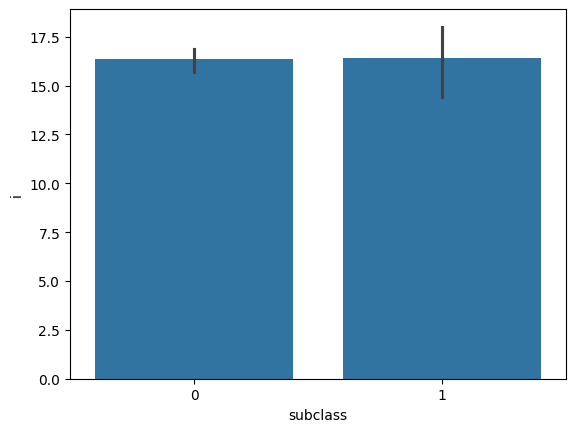

In [ ]:
sns.barplot(x=df['subclass'], y=df['i'])

<Axes: xlabel='subclass', ylabel='z'>

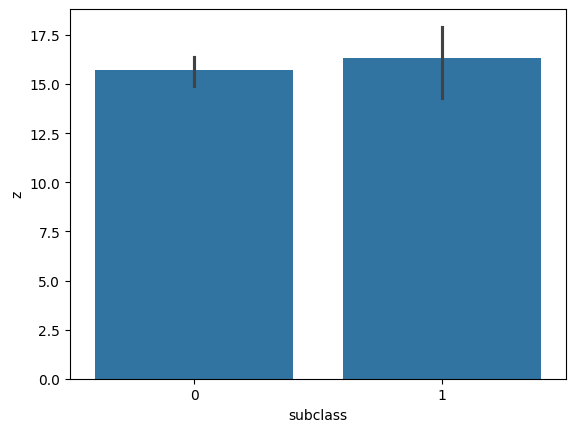

In [ ]:
sns.barplot(x='subclass',y='z',data=df)

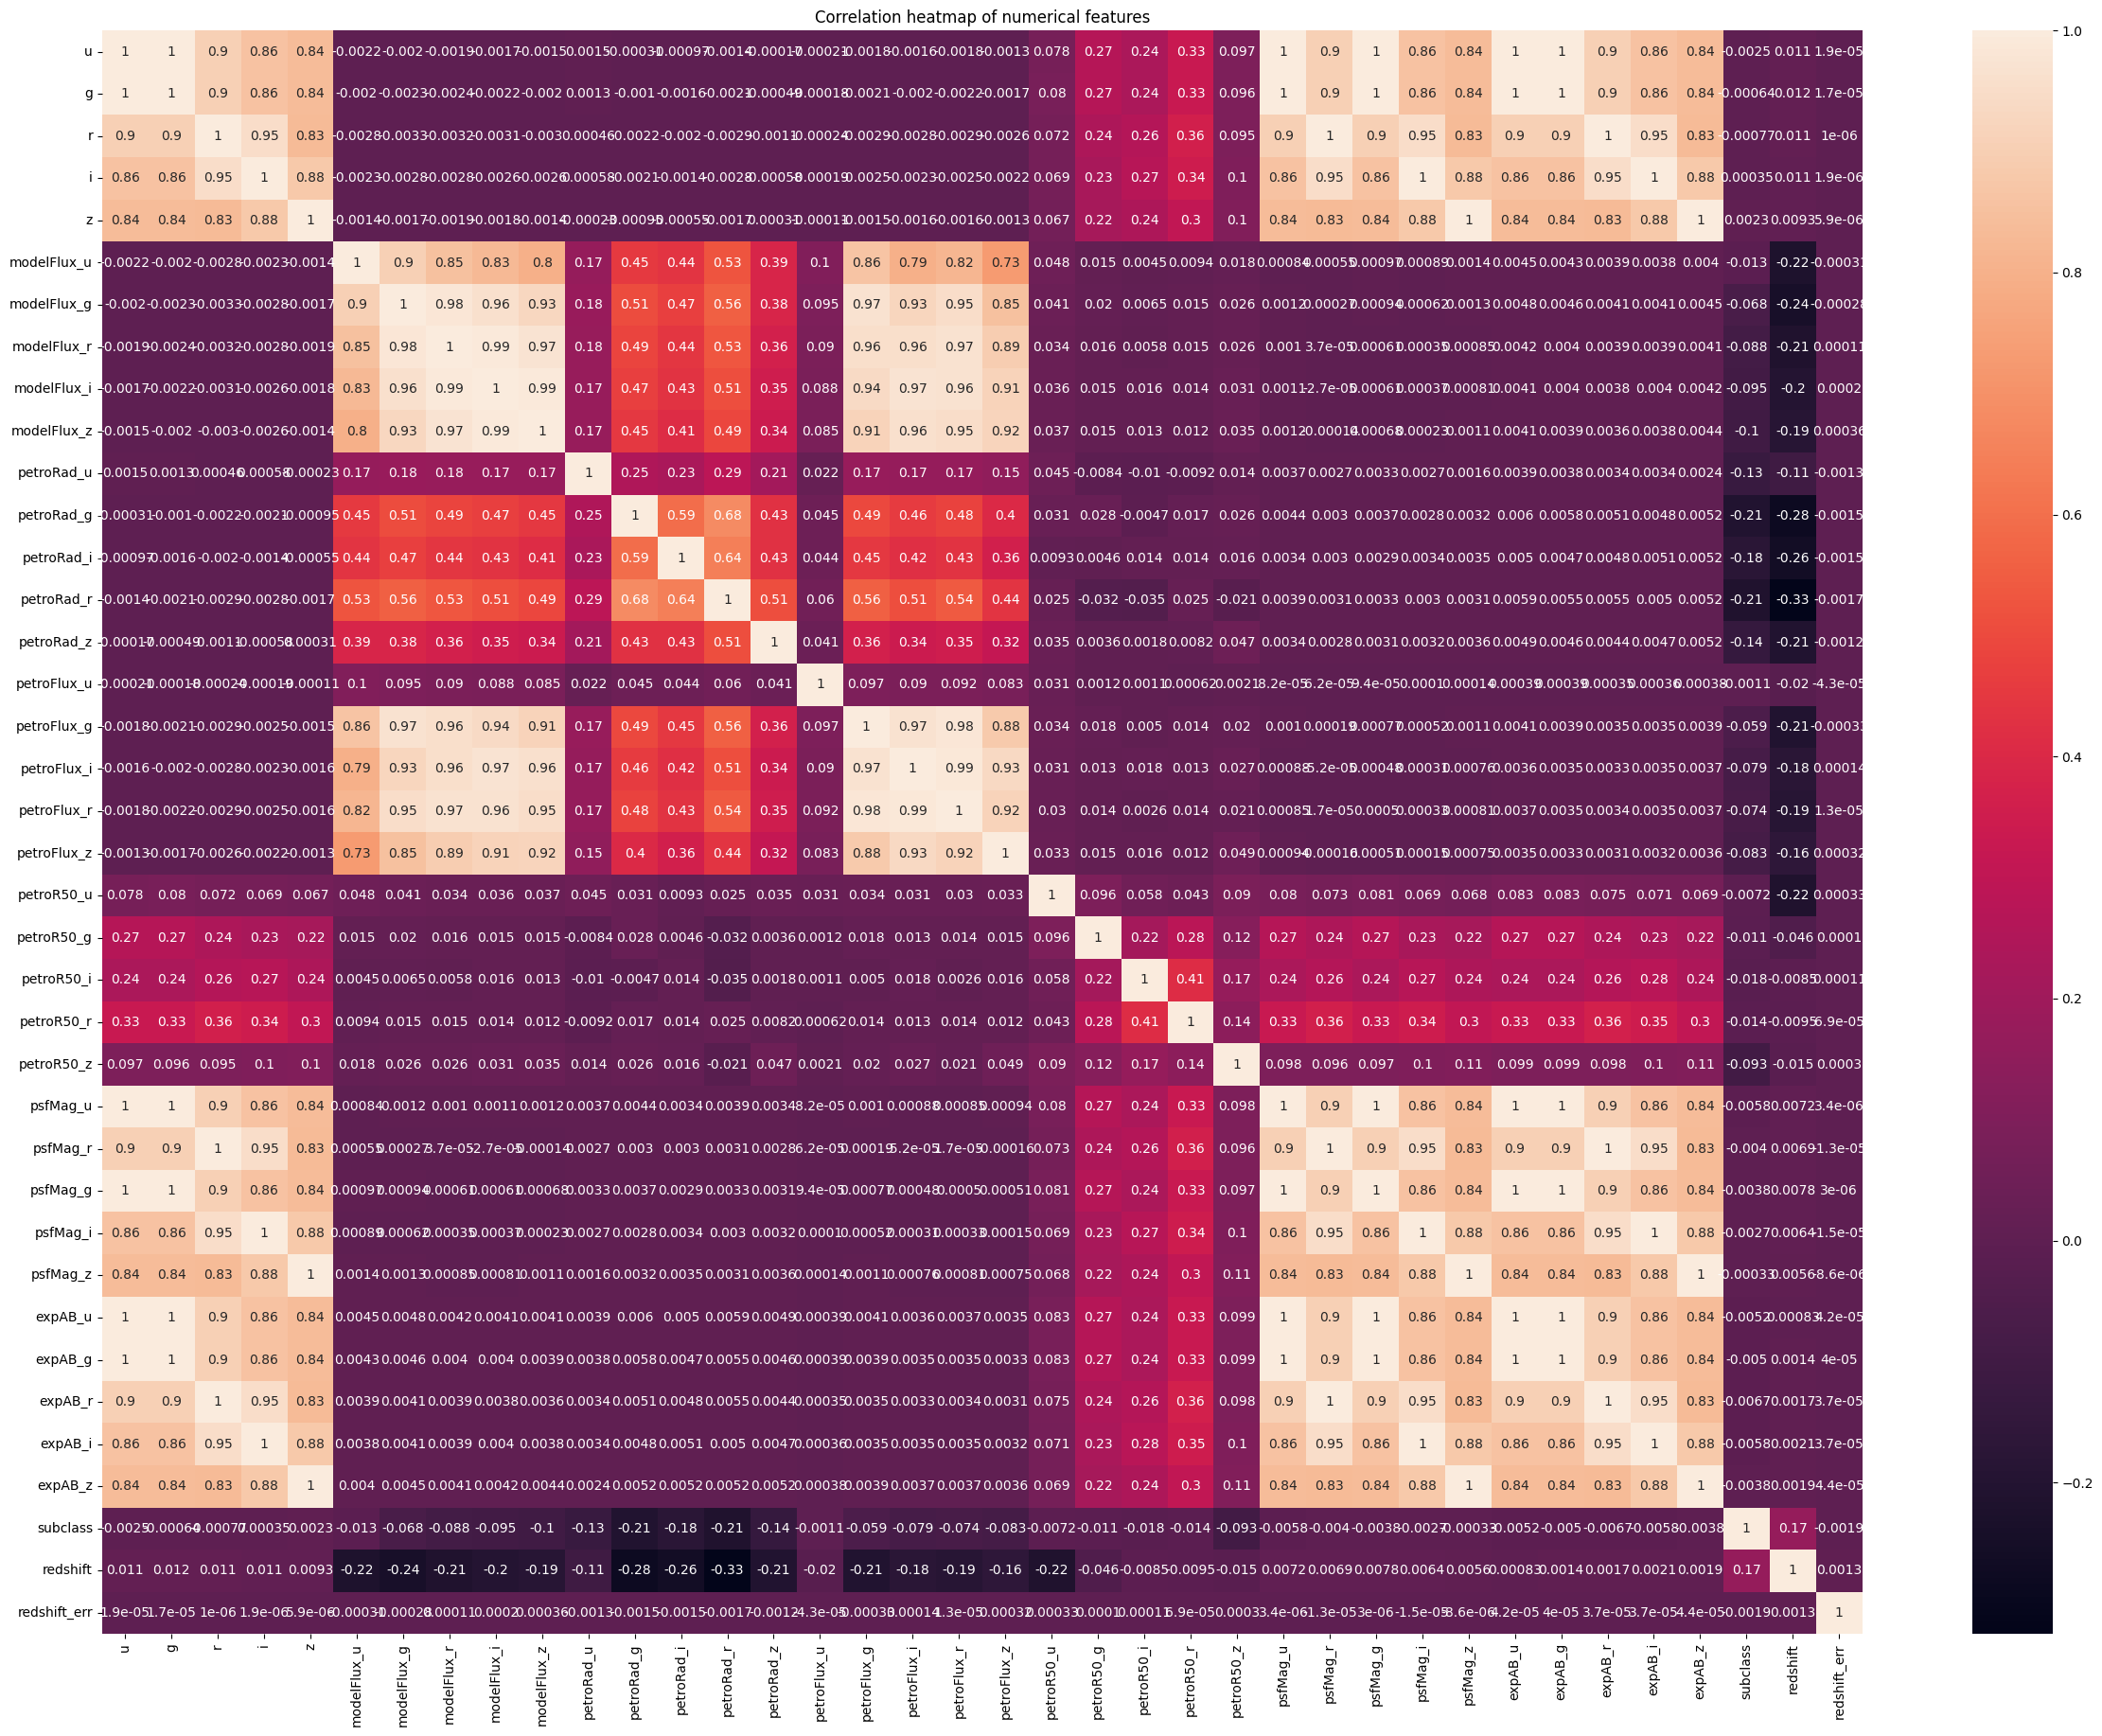

In [ ]:
plt. figure(figsize=(30, 22))
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation heatmap of numerical features')
plt.show()

<Axes: ylabel='u'>

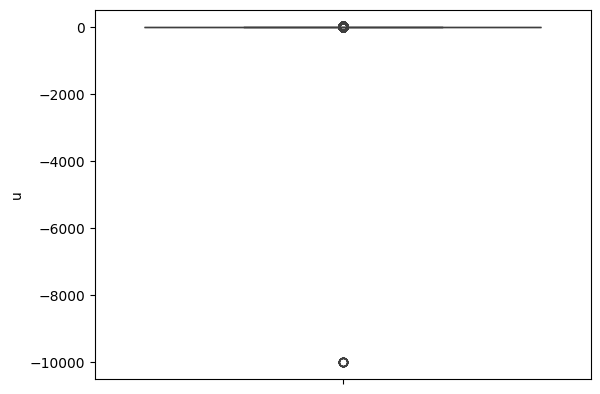

In [ ]:
sns.boxplot(y='u',data=df)

In [ ]:
quant=df['u'].quantile(q=[0.75,0.25])
print(quant)
Q3=quant.loc[0.75]
print(Q3)
Q1=quant.loc[0.25]
print(Q1)
IQR=Q3-Q1
print(IQR)
maxwhisker=Q3+1.5*IQR
print(maxwhisker)
minwhisker=Q1-1.5*IQR
print(minwhisker)

0.75    20.079470
0.25    18.762215
Name: u, dtype: float64
20.07947
18.762214999999998
1.317255000000003
22.055352500000005
16.786332499999993


In [ ]:
df['u']=np.where(df['u']>20.07947,20.07947,df['u'])
df['u']=np.where(df['u']<18.762214999999998,18.762214999999998,df['u'])

<Axes: ylabel='u'>

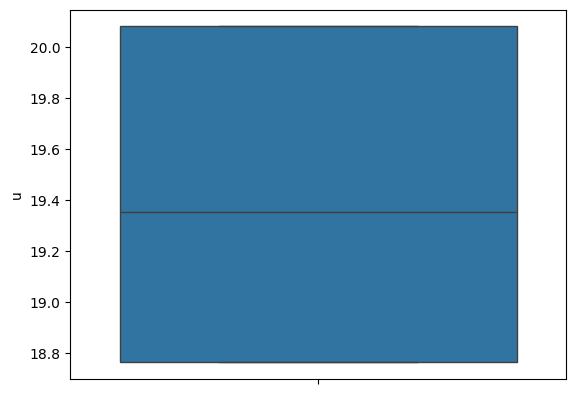

In [ ]:
sns.boxplot(y='u',data=df)

In [ ]:
target_column = 'subclass'

def handle_outliers(column):
    quant = column.quantile(q=[0.75, 0.25])
    Q3 = quant.loc[0.75]
    Q1 = quant.loc[0.25]
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR
    column = np.where(column > upper_bound, upper_bound, column)
    column = np.where(column < lower_bound, lower_bound, column)
    return column, upper_bound, lower_bound

numeric_cols = df.select_dtypes(include=['number']).columns
numeric_cols = [col for col in numeric_cols if col != target_column]

Column: u
Upper Bound for Outliers: 22.055346875000005
Lower Bound for Outliers: 16.786341874999998


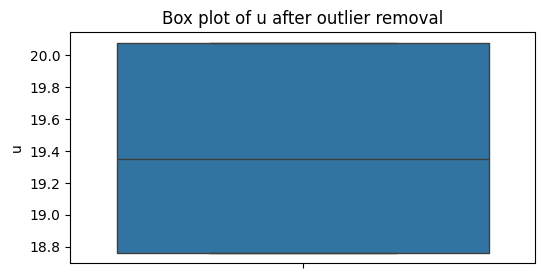

Column: g
Upper Bound for Outliers: 20.381655
Lower Bound for Outliers: 15.780395000000002


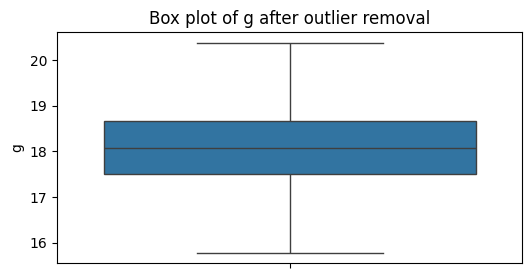

Column: r
Upper Bound for Outliers: 19.469026250000002
Lower Bound for Outliers: 15.35673625


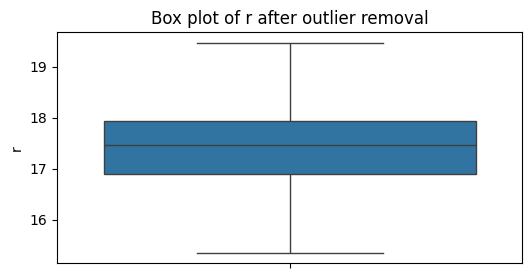

Column: i
Upper Bound for Outliers: 19.19097875
Lower Bound for Outliers: 14.928768750000001


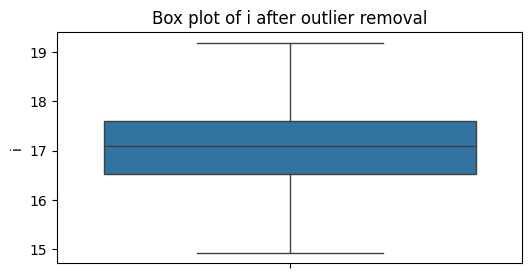

Column: z
Upper Bound for Outliers: 19.212627500000004
Lower Bound for Outliers: 14.522547499999996


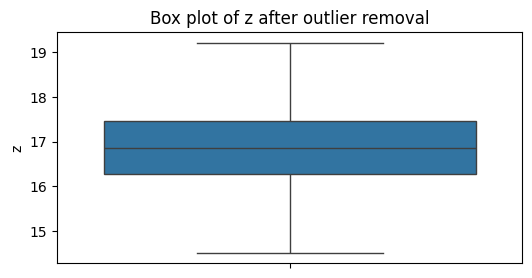

Column: modelFlux_u
Upper Bound for Outliers: 64.21687075
Lower Bound for Outliers: -23.669111249999997


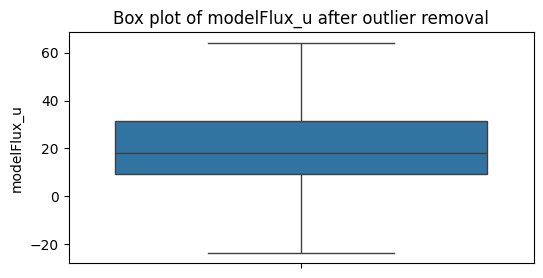

Column: modelFlux_g
Upper Bound for Outliers: 196.90068374999998
Lower Bound for Outliers: -62.99976624999999


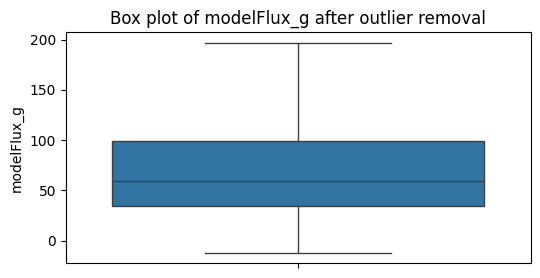

Column: modelFlux_r
Upper Bound for Outliers: 333.6421975
Lower Bound for Outliers: -92.25906250000001


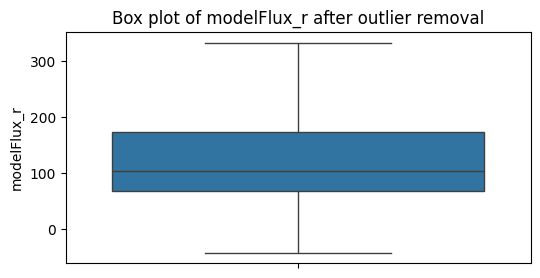

Column: modelFlux_i
Upper Bound for Outliers: 474.69607499999995
Lower Bound for Outliers: -137.97392499999995


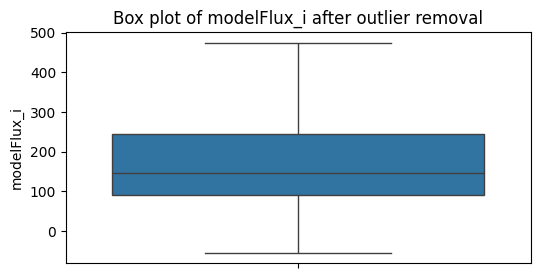

Column: modelFlux_z
Upper Bound for Outliers: 611.2268624999999
Lower Bound for Outliers: -199.92563749999994


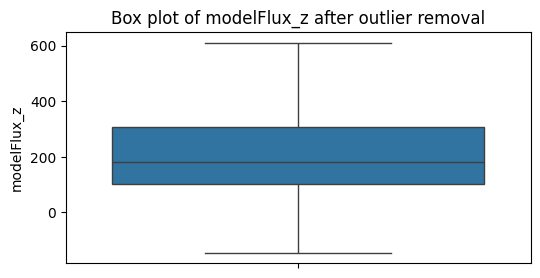

Column: petroRad_u
Upper Bound for Outliers: 15.490691875
Lower Bound for Outliers: -3.9904171249999996


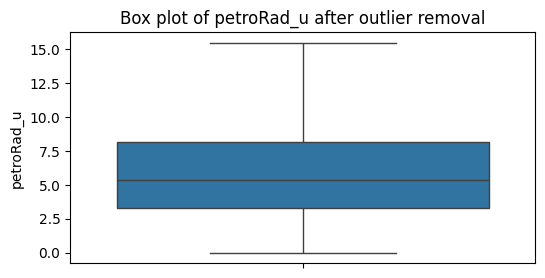

Column: petroRad_g
Upper Bound for Outliers: 12.222739500000001
Lower Bound for Outliers: -1.897624500000001


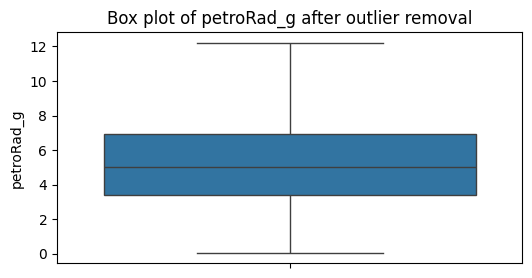

Column: petroRad_i
Upper Bound for Outliers: 11.28945375
Lower Bound for Outliers: -1.372438250000001


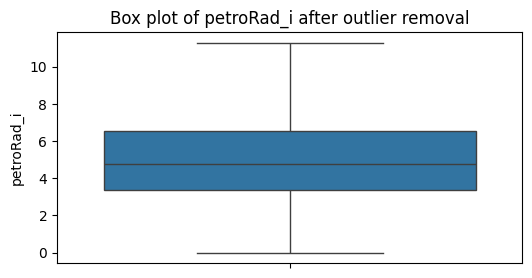

Column: petroRad_r
Upper Bound for Outliers: 11.676203000000001
Lower Bound for Outliers: -1.5261750000000012


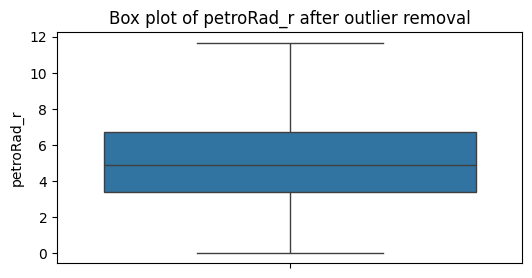

Column: petroRad_z
Upper Bound for Outliers: 11.212585874999998
Lower Bound for Outliers: -1.2890891249999994


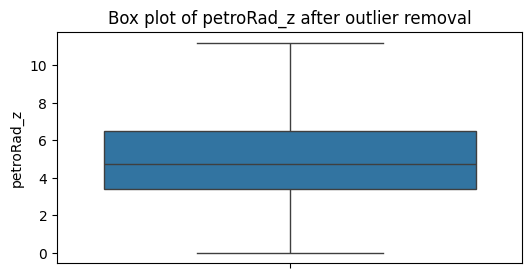

Column: petroFlux_u
Upper Bound for Outliers: 65.49768775
Lower Bound for Outliers: -24.47496625


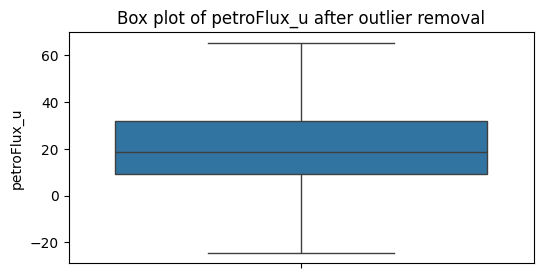

Column: petroFlux_g
Upper Bound for Outliers: 191.49622
Lower Bound for Outliers: -60.58846


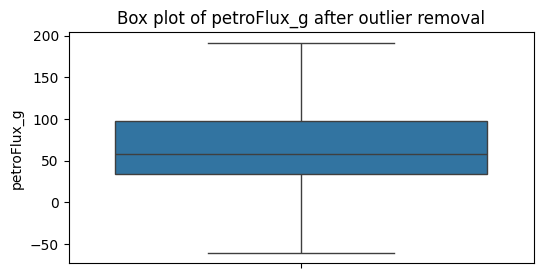

Column: petroFlux_i
Upper Bound for Outliers: 437.03996125
Lower Bound for Outliers: -122.68726874999999


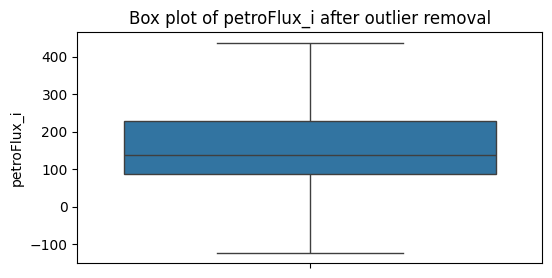

Column: petroFlux_r
Upper Bound for Outliers: 314.61387874999997
Lower Bound for Outliers: -82.84313124999997


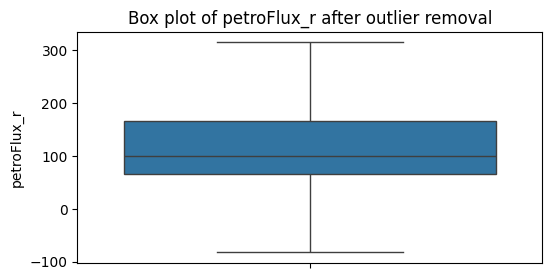

Column: petroFlux_z
Upper Bound for Outliers: 540.08705375
Lower Bound for Outliers: -178.90415625


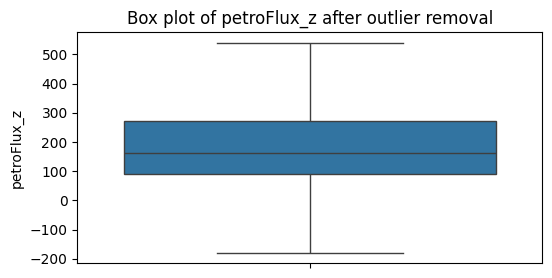

Column: petroR50_u
Upper Bound for Outliers: 6.1233509999999995
Lower Bound for Outliers: -1.093203


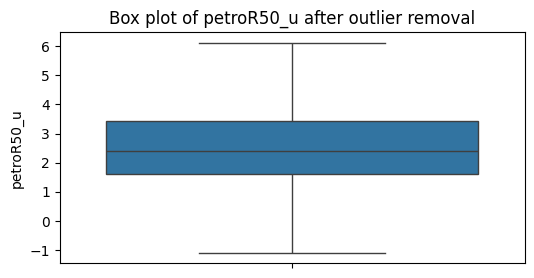

Column: petroR50_g
Upper Bound for Outliers: 5.606375875
Lower Bound for Outliers: -0.7522371250000002


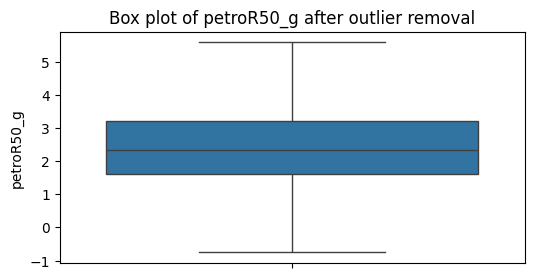

Column: petroR50_i
Upper Bound for Outliers: 5.103804499999999
Lower Bound for Outliers: -0.5851314999999992


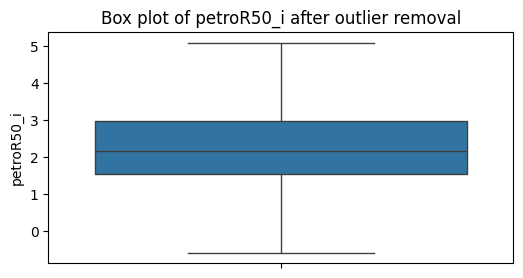

Column: petroR50_r
Upper Bound for Outliers: 5.2709107500000005
Lower Bound for Outliers: -0.6087272499999998


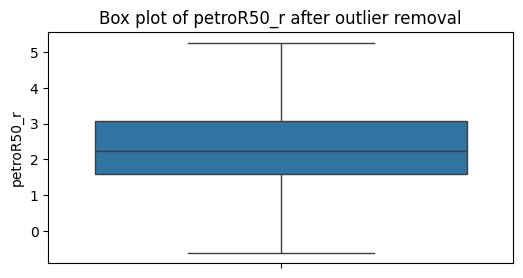

Column: petroR50_z
Upper Bound for Outliers: 4.731718125
Lower Bound for Outliers: -0.4320048750000005


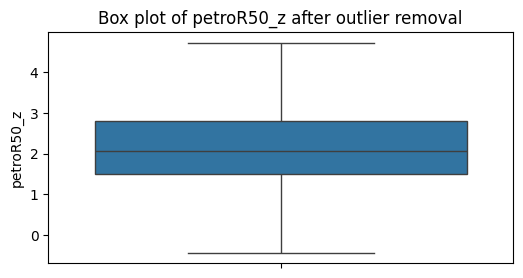

Column: psfMag_u
Upper Bound for Outliers: 23.37818375
Lower Bound for Outliers: 18.67697375


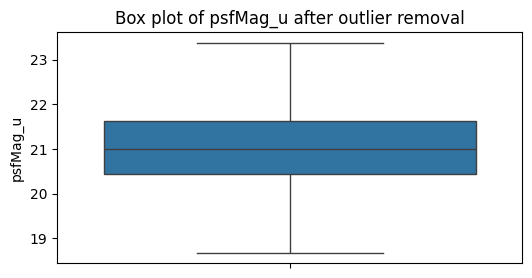

Column: psfMag_r
Upper Bound for Outliers: 21.705982499999998
Lower Bound for Outliers: 16.8410625


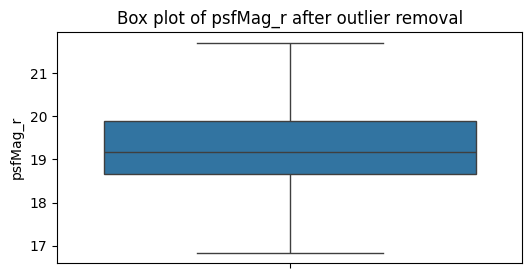

Column: psfMag_g
Upper Bound for Outliers: 22.135263749999993
Lower Bound for Outliers: 17.531293750000003


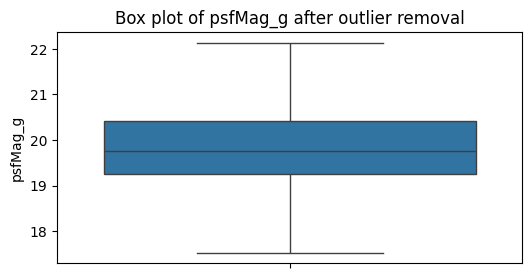

Column: psfMag_i
Upper Bound for Outliers: 21.523002499999997
Lower Bound for Outliers: 16.359202500000002


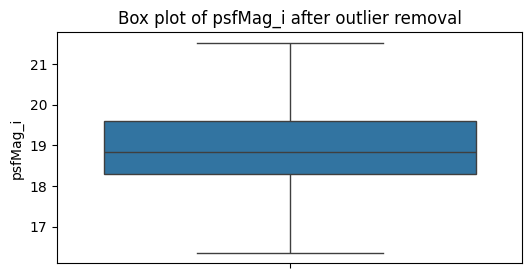

Column: psfMag_z
Upper Bound for Outliers: 21.261171250000004
Lower Bound for Outliers: 16.029861249999996


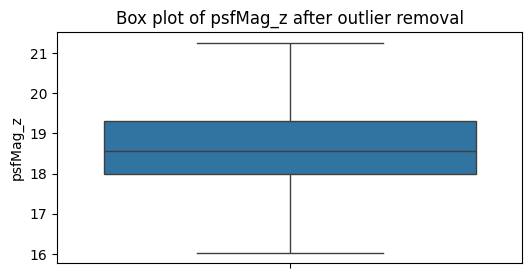

Column: expAB_u
Upper Bound for Outliers: 1.2997675249999998
Lower Bound for Outliers: -0.2998614749999998


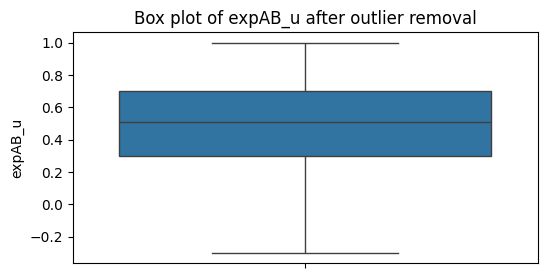

Column: expAB_g
Upper Bound for Outliers: 1.3239540625
Lower Bound for Outliers: -0.15644523749999983


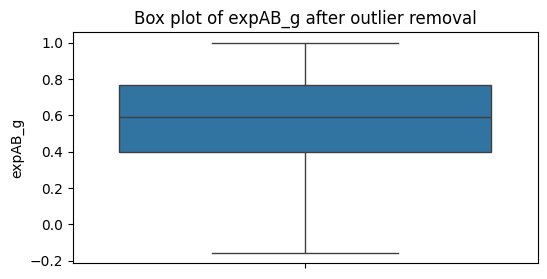

Column: expAB_r
Upper Bound for Outliers: 1.3066260124999998
Lower Bound for Outliers: -0.11391288749999995


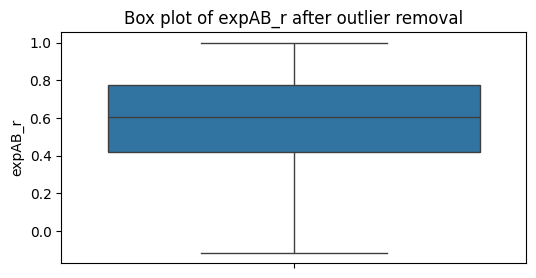

Column: expAB_i
Upper Bound for Outliers: 1.3048134
Lower Bound for Outliers: -0.1130384000000001


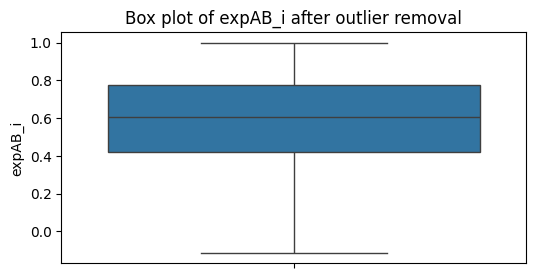

Column: expAB_z
Upper Bound for Outliers: 1.3088449624999998
Lower Bound for Outliers: -0.17524673749999997


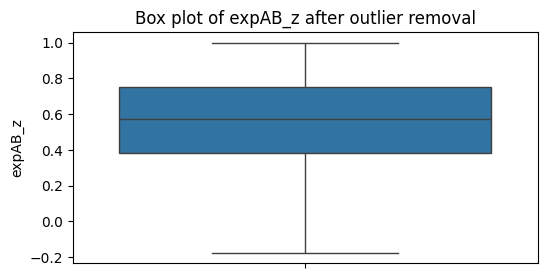

Column: redshift
Upper Bound for Outliers: 0.25411610250000005
Lower Bound for Outliers: -0.06313203750000003


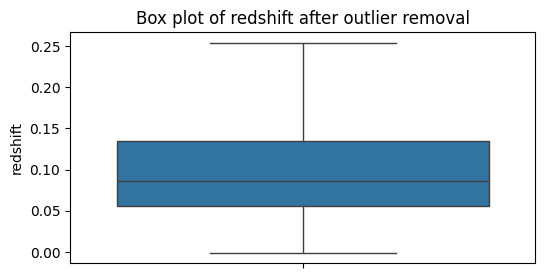

Column: redshift_err
Upper Bound for Outliers: 2.6857152750000003e-05
Lower Bound for Outliers: -3.554101250000002e-06


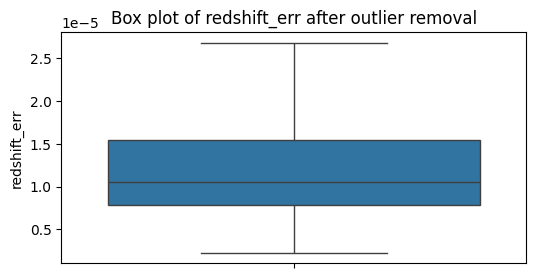

In [ ]:
for col in numeric_cols:
    df[col], upper_bound, lower_bound = handle_outliers(df[col])
    print(f'Column: {col}')
    print(f'Upper Bound for Outliers: {upper_bound}')
    print(f'Lower Bound for Outliers: {lower_bound}')

    plt.figure(figsize=(6, 3))
    sns.boxplot(y=df[col])
    plt.title(f'Box plot of {col} after outlier removal')
    plt.show()

In [ ]:
df.shape

(100000, 38)

In [ ]:
X=df.drop(['subclass'],axis=1)
y=df['subclass']

from sklearn.feature_selection import SelectKBest, f_classif

selector=SelectKBest(score_func=f_classif,k=10)
X_selected=selector.fit_transform(X,y)
selected_features=X.columns[selector.get_support()]

print("selected features",selected_features)

selected features Index(['r', 'i', 'z', 'petroRad_g', 'petroRad_r', 'petroR50_u', 'petroR50_g',
       'petroR50_i', 'petroR50_r', 'petroR50_z'],
      dtype='object')


In [ ]:
sub=df['subclass'].value_counts()
sub

,count
subclass,
0,74993
1,25007


In [ ]:
sub=y.value_counts()
print(sub)

subclass
0    74993
1    25007
Name: count, dtype: int64


In [ ]:
from imblearn.over_sampling import SMOTE

smote=SMOTE(random_state=42)
X_resampled,y_resampled=smote.fit_resample(X_selected,y)

sub=y_resampled.value_counts()
print(sub)

subclass
0    74993
1    74993
Name: count, dtype: int64


In [ ]:
sub=y_resampled.value_counts()
sub

,count
subclass,
0,74993
1,74993


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.20, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# **Model building**

In [ ]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

y_pred=dt.predict(X_test)
report=classification_report(y_test,y_pred)

print("Classification report:\n\n",report)

print(f'Accuracy score: {accuracy_score(y_pred,y_test)}')

Classification report:

               precision    recall  f1-score   support

           0       0.81      0.80      0.81     14955
           1       0.80      0.82      0.81     15043

    accuracy                           0.81     29998
   macro avg       0.81      0.81      0.81     29998
weighted avg       0.81      0.81      0.81     29998

Accuracy score: 0.8078205213680912


In [ ]:
lg=LogisticRegression()
log=lg.fit(X_train,y_train)

y_pred=lg.predict(X_test)
print("Confusion matrix:\n",confusion_matrix(y_test,y_pred))
print("\nClassification report:\n\n",classification_report(y_test,y_pred))
print(f'Accuracy score:\t{accuracy_score(y_pred,y_test)}')

Confusion matrix:
 [[12288  2667]
 [ 3285 11758]]

Classification report:

               precision    recall  f1-score   support

           0       0.79      0.82      0.81     14955
           1       0.82      0.78      0.80     15043

    accuracy                           0.80     29998
   macro avg       0.80      0.80      0.80     29998
weighted avg       0.80      0.80      0.80     29998

Accuracy score:	0.8015867724514968


In [ ]:
RF=RandomForestClassifier()
RF.fit(X_train,y_train)
RFtrain=RF.predict(X_train)
RFtest=RF.predict(X_test)

In [ ]:
print(confusion_matrix(RFtrain,y_train))
print(confusion_matrix(RFtest,y_test))
print(classification_report(RFtrain,y_train))
print(classification_report(RFtest,y_test))

print(accuracy_score(RFtrain,y_train))
print(accuracy_score(RFtest,y_test))

[[60038   290]
 [    0 59660]]
[[12928  1671]
 [ 2027 13372]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     60328
           1       1.00      1.00      1.00     59660

    accuracy                           1.00    119988
   macro avg       1.00      1.00      1.00    119988
weighted avg       1.00      1.00      1.00    119988

              precision    recall  f1-score   support

           0       0.86      0.89      0.87     14599
           1       0.89      0.87      0.88     15399

    accuracy                           0.88     29998
   macro avg       0.88      0.88      0.88     29998
weighted avg       0.88      0.88      0.88     29998

0.9975830916424976
0.8767251150076671


In [ ]:
import joblib

joblib.dump(RF,'RandomForest.pkl')
joblib.dump(sc, 'scaler.pkl')

import json
with open('selected_features.json', 'w') as f:
    json.dump(list(selected_features), f)

In [ ]:
input_row = df[selected_features].iloc[0]
input_df = pd.DataFrame([input_row])
predicted_class = RF.predict(input_df)
predicted_class


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


array([1])

In [ ]:
pip freeze > requirements.txt